In [1]:
import numpy as np 
import pandas as pd 

In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import seaborn as sns
from sklearn. linear_model import Lasso

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
import pandas as pd
data=pd.read_csv('C:/Users/archa/Downloads/dataset Tomato (Price) new.csv')
data

,Date,Incoming Quintel,Lowest Price,Highest Price,Avg_Price,Price,Temperature in CC,Month,Tomato Quality,Season
0,1/1/2021,106.0,400.0,600.0,500.0,5300.0,17.8,Jan,Good,Cloudy
1,1/2/2021,130.0,500.0,700.0,600.0,7800.0,18.7,Jan,Good,Cloudy
2,1/3/2021,152.0,400.0,600.0,400.0,60800.0,19.7,Jan,Good,Cloudy
3,1/4/2021,104.0,300.0,640.0,475.0,49400.0,20.2,Jan,Good,Cloudy
4,1/5/2021,95.0,300.0,700.0,400.0,38000.0,20.8,Jan,Average,Cloudy
...,...,...,...,...,...,...,...,...,...,...
816,10/2/2023,115.0,500.0,1000.0,750.0,65500.0,29.5,Oct,Good,Cloudy
817,10/3/2023,126.0,500.0,1000.0,750.0,94500.0,28.0,Oct,Good,Cloudy
818,10/4/2023,119.0,600.0,900.0,750.0,89200.0,28.0,Oct,Good,Cloudy
819,10/5/2023,193.0,300.0,900.0,600.0,115400.0,27.0,Oct,Good,Cloudy


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               821 non-null    object 
 1   Incoming Quintel   820 non-null    float64
 2   Lowest Price       820 non-null    float64
 3   Highest Price      820 non-null    float64
 4   Avg_Price          820 non-null    float64
 5   Price              820 non-null    float64
 6   Temperature in CC  821 non-null    float64
 7   Month              821 non-null    object 
 8   Tomato Quality     821 non-null    object 
 9   Season             821 non-null    object 
dtypes: float64(6), object(4)
memory usage: 64.3+ KB


In [7]:
data.replace({'Season':{'Cloudy':1,'Sunny':2,'Rainy':3}},inplace=True)
data.replace({'Tomato Quality':{'Good': 1,'Bad': 2,'Average': 3}},inplace=True)

    
data.replace({'Month':{ 
        'Jan': 1,
        'Feb': 2,
        'Mar': 3,
        'Apr': 4,
        'May': 5,
        'Jun': 6,
        'Jul': 7,
        'Aug': 8,
        'Sep': 9,
        'Oct': 10,
        'Nov': 11,
        'Dec': 12}},inplace=True)
data
              

,Date,Incoming Quintel,Lowest Price,Highest Price,Avg_Price,Price,Temperature in CC,Month,Tomato Quality,Season
0,1/1/2021,106.0,400.0,600.0,500.0,5300.0,17.8,1,1,1
1,1/2/2021,130.0,500.0,700.0,600.0,7800.0,18.7,1,1,1
2,1/3/2021,152.0,400.0,600.0,400.0,60800.0,19.7,1,1,1
3,1/4/2021,104.0,300.0,640.0,475.0,49400.0,20.2,1,1,1
4,1/5/2021,95.0,300.0,700.0,400.0,38000.0,20.8,1,3,1
...,...,...,...,...,...,...,...,...,...,...
816,10/2/2023,115.0,500.0,1000.0,750.0,65500.0,29.5,10,1,1
817,10/3/2023,126.0,500.0,1000.0,750.0,94500.0,28.0,10,1,1
818,10/4/2023,119.0,600.0,900.0,750.0,89200.0,28.0,10,1,1
819,10/5/2023,193.0,300.0,900.0,600.0,115400.0,27.0,10,1,1


In [8]:
data.replace({'Tomato Quality':{'Good': 1,'Bad': 2,'Average': 3}},inplace=True)
data
    

,Date,Incoming Quintel,Lowest Price,Highest Price,Avg_Price,Price,Temperature in CC,Month,Tomato Quality,Season
0,1/1/2021,106.0,400.0,600.0,500.0,5300.0,17.8,1,1,1
1,1/2/2021,130.0,500.0,700.0,600.0,7800.0,18.7,1,1,1
2,1/3/2021,152.0,400.0,600.0,400.0,60800.0,19.7,1,1,1
3,1/4/2021,104.0,300.0,640.0,475.0,49400.0,20.2,1,1,1
4,1/5/2021,95.0,300.0,700.0,400.0,38000.0,20.8,1,3,1
...,...,...,...,...,...,...,...,...,...,...
816,10/2/2023,115.0,500.0,1000.0,750.0,65500.0,29.5,10,1,1
817,10/3/2023,126.0,500.0,1000.0,750.0,94500.0,28.0,10,1,1
818,10/4/2023,119.0,600.0,900.0,750.0,89200.0,28.0,10,1,1
819,10/5/2023,193.0,300.0,900.0,600.0,115400.0,27.0,10,1,1


In [9]:
index_to_delete = 236
data = data.drop(index_to_delete)

In [10]:
data

,Date,Incoming Quintel,Lowest Price,Highest Price,Avg_Price,Price,Temperature in CC,Month,Tomato Quality,Season
0,1/1/2021,106.0,400.0,600.0,500.0,5300.0,17.8,1,1,1
1,1/2/2021,130.0,500.0,700.0,600.0,7800.0,18.7,1,1,1
2,1/3/2021,152.0,400.0,600.0,400.0,60800.0,19.7,1,1,1
3,1/4/2021,104.0,300.0,640.0,475.0,49400.0,20.2,1,1,1
4,1/5/2021,95.0,300.0,700.0,400.0,38000.0,20.8,1,3,1
...,...,...,...,...,...,...,...,...,...,...
816,10/2/2023,115.0,500.0,1000.0,750.0,65500.0,29.5,10,1,1
817,10/3/2023,126.0,500.0,1000.0,750.0,94500.0,28.0,10,1,1
818,10/4/2023,119.0,600.0,900.0,750.0,89200.0,28.0,10,1,1
819,10/5/2023,193.0,300.0,900.0,600.0,115400.0,27.0,10,1,1


In [11]:
print(data.columns)
data = data.dropna()



Index(['Date', 'Incoming Quintel', 'Lowest Price', 'Highest Price',
       'Avg_Price', 'Price', 'Temperature in CC', 'Month', 'Tomato Quality',
       'Season'],
      dtype='object')


In [12]:
import pandas as pd
y = data['Price']
X = data.drop(['Price',"Date"], axis=1)

# #for demand
z = data['Avg_Price']
w = data.drop(['Lowest Price','Highest Price','Date','Incoming Quintel','Avg_Price'], axis =1)

In [13]:
y

0        5300.0
1        7800.0
2       60800.0
3       49400.0
4       38000.0
         ...   
816     65500.0
817     94500.0
818     89200.0
819    115400.0
820     10800.0
Name: Price, Length: 819, dtype: float64

In [14]:
X

,Incoming Quintel,Lowest Price,Highest Price,Avg_Price,Temperature in CC,Month,Tomato Quality,Season
0,106.0,400.0,600.0,500.0,17.8,1,1,1
1,130.0,500.0,700.0,600.0,18.7,1,1,1
2,152.0,400.0,600.0,400.0,19.7,1,1,1
3,104.0,300.0,640.0,475.0,20.2,1,1,1
4,95.0,300.0,700.0,400.0,20.8,1,3,1
...,...,...,...,...,...,...,...,...
816,115.0,500.0,1000.0,750.0,29.5,10,1,1
817,126.0,500.0,1000.0,750.0,28.0,10,1,1
818,119.0,600.0,900.0,750.0,28.0,10,1,1
819,193.0,300.0,900.0,600.0,27.0,10,1,1


In [15]:
print(data.columns)

Index(['Date', 'Incoming Quintel', 'Lowest Price', 'Highest Price',
       'Avg_Price', 'Price', 'Temperature in CC', 'Month', 'Tomato Quality',
       'Season'],
      dtype='object')


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,shuffle=True,random_state=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,shuffle=True,random_state=1)
w_train,w_test,z_train,z_test=train_test_split(w,z,train_size=0.8,shuffle=True,random_state=1)
w_train,w_test,z_train,z_test=train_test_split(w,z,train_size=0.8,shuffle=True,random_state=1)

In [17]:
X_test.shape

(164, 8)

In [18]:
# Check for missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Check data types
print(X_train.dtypes)
print(y_train.dtypes)


Incoming Quintel     0
Lowest Price         0
Highest Price        0
Avg_Price            0
Temperature in CC    0
Month                0
Tomato Quality       0
Season               0
dtype: int64
0
Incoming Quintel     float64
Lowest Price         float64
Highest Price        float64
Avg_Price            float64
Temperature in CC    float64
Month                  int64
Tomato Quality         int64
Season                 int64
dtype: object
float64


In [19]:
np.random.seed(0)
X=np.random.rand(821,10)
y=np.random.rand(821,1)

In [20]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (655, 8)
y_train shape: (655,)


In [21]:
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in y_train:", y_train.isnull().sum().sum())


NaN values in X_train: 0
NaN values in y_train: 0


In [22]:
print("Data types in X_train:", X_train.dtypes.unique())
print("Data type in y_train:", y_train.dtypes)


Data types in X_train: [dtype('float64') dtype('int64')]
Data type in y_train: float64


In [23]:
X_train = X_train.values
y_train = y_train.values


In [24]:
# Create a linear regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [54]:
# model.predict(X_test, y_test)

In [25]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                               XGBoost": XGBRegressor(),
    "                              LightGBM": LGBMRegressor(),
    "                              CatBoost": CatBoostRegressor(verbose=0)
}


In [26]:

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 655, number of used features: 8
[LightGBM] [Info] Start training from score 141367.983206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [43]:
#model selection linear regression
price_reg_model= CatBoostRegressor(verbose=0)
price_reg_model.fit(X_train,y_train)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


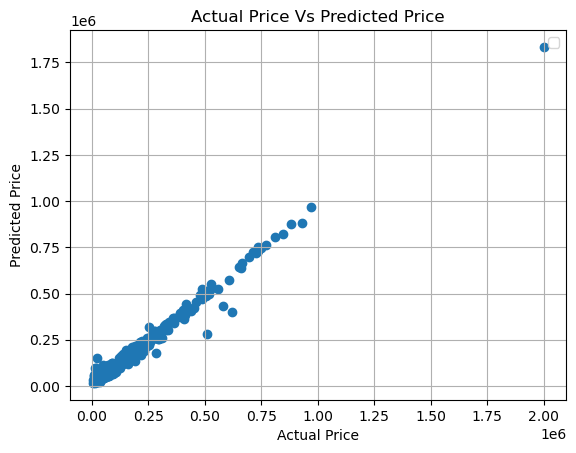

In [48]:
#visualize the actual prices and Predicted prices
from matplotlib import pyplot as plt
#plt.scatter(X_train,y_train, color = 'blue', label = 'Actual')
plt.scatter(y_train,price_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

In [46]:
data

,Date,Incoming Quintel,Lowest Price,Highest Price,Avg_Price,Price,Temperature in CC,Month,Tomato Quality,Season
0,1/1/2021,106.0,400.0,600.0,500.0,5300.0,17.8,1,1,1
1,1/2/2021,130.0,500.0,700.0,600.0,7800.0,18.7,1,1,1
2,1/3/2021,152.0,400.0,600.0,400.0,60800.0,19.7,1,1,1
3,1/4/2021,104.0,300.0,640.0,475.0,49400.0,20.2,1,1,1
4,1/5/2021,95.0,300.0,700.0,400.0,38000.0,20.8,1,3,1
...,...,...,...,...,...,...,...,...,...,...
816,10/2/2023,115.0,500.0,1000.0,750.0,65500.0,29.5,10,1,1
817,10/3/2023,126.0,500.0,1000.0,750.0,94500.0,28.0,10,1,1
818,10/4/2023,119.0,600.0,900.0,750.0,89200.0,28.0,10,1,1
819,10/5/2023,193.0,300.0,900.0,600.0,115400.0,27.0,10,1,1
